# PyQuil example: Ripple adder
Based on Vedral, Barenco, and Ekert (1996).

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-pyquil

In [1]:
from pyquil import get_qc, Program
from pyquil.gates import X, CNOT, CCNOT, MEASURE
from pyquil.latex import to_latex, display
from pyquil.quil import address_qubits
from pyquil.quilatom import QubitPlaceholder

In [2]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)0001
Segundo sumando en binario(4 bits)0001


In [3]:
n = 4

p = Program()


a = QubitPlaceholder.register(n)
b = QubitPlaceholder.register(n+1)
c = QubitPlaceholder.register(n)

ro = p.declare('ro', 'BIT', n+1)


for i in range(n):
    if sumando_1[i] == "1":
        p += X(a[n - (i+1)])
for i in range(n):
    if sumando_2[i] == "1":
        p += X(b[n - (i+1)])
        
for i in range(n-1):
    p += CCNOT(a[i], b[i], c[i+1])
    p += CNOT(a[i], b[i])
    p += CCNOT(a[i], b[i], c[i+1])

p += CCNOT(a[n-1], b[n-1], b[n])
p += CNOT(a[n-1], b[n-1])
p += CCNOT(a[n-1], b[n-1], b[n])  

p += CNOT(c[n-1], b[n-1])

for i in range(n-1):
    p += CCNOT(c[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    p += CNOT(a[(n-2)-i], b[(n-2)-i])
    p += CCNOT(a[(n-2)-i], b[(n-2)-i], c[(n-1)-i])
    
    p += CNOT(c[(n-2)-i], b[(n-2)-i])
    p += CNOT(a[(n-2)-i], b[(n-2)-i])


for i in range(n+1):
    p += MEASURE(b[i], ro[i])

p.wrap_in_numshots_loop(20)

print(address_qubits(p)) 

DECLARE ro BIT[5]
X 0
X 1
CCNOT 0 1 2
CNOT 0 1
CCNOT 0 1 2
CCNOT 3 4 5
CNOT 3 4
CCNOT 3 4 5
CCNOT 6 7 8
CNOT 6 7
CCNOT 6 7 8
CCNOT 9 10 11
CNOT 9 10
CCNOT 9 10 11
CNOT 8 10
CCNOT 5 7 8
CNOT 6 7
CCNOT 6 7 8
CNOT 5 7
CNOT 6 7
CCNOT 2 4 5
CNOT 3 4
CCNOT 3 4 5
CNOT 2 4
CNOT 3 4
CCNOT 12 1 2
CNOT 0 1
CCNOT 0 1 2
CNOT 12 1
CNOT 0 1
MEASURE 1 ro[0]
MEASURE 4 ro[1]
MEASURE 7 ro[2]
MEASURE 10 ro[3]
MEASURE 11 ro[4]



In [21]:
from pyquil import list_quantum_computers
print(list_quantum_computers())

['Aspen-7-28Q-A', 'Aspen-7-14Q-C', 'Aspen-7-13Q-C', 'Aspen-4-13Q-E', 'Aspen-7-12Q-C', 'Aspen-7-11Q-C', 'Aspen-7-10Q-C', 'Aspen-4-9Q-E', 'Aspen-7-9Q-C', 'Aspen-7-8Q-C', 'Aspen-4-8Q-F', 'Aspen-4-7Q-F', 'Aspen-7-7Q-C', 'Aspen-7-6Q-C', 'Aspen-4-6Q-F', 'Aspen-7-5Q-C', 'Aspen-4-5Q-E', 'Aspen-7-4Q-D', 'Aspen-4-4Q-D', 'Aspen-4-4Q-F', 'Aspen-7-3Q-C', 'Aspen-4-3Q-F', 'Aspen-4-3Q-G', 'Aspen-7-2Q-C', 'Aspen-4-2Q-C', 'Aspen-4-2Q-H', '9q-square-qvm', '9q-square-noisy-qvm']


In [23]:
#qvm = get_qc(str(2*n+1)+"q-qvm")

qvm = get_qc("Aspen-7-28Q-A", as_qvm=True)

In [24]:
cp = qvm.compile(address_qubits(p),protoquil=True)

In [25]:
print(cp.program)

DECLARE ro BIT[5]
RX(pi) 32
CZ 32 31
RX(pi) 16
CZ 16 17
RX(pi/2) 12
RZ(-3.0761091086471977) 12
RX(-pi/2) 12
RZ(-2.35406633988804) 12
RX(pi/2) 12
RZ(0.9317843330464246) 12
RX(-pi/2) 12
RX(pi/2) 13
RZ(-2.3009408748502995) 13
RX(-pi/2) 13
RZ(-0.5719412675491293) 13
RX(pi/2) 13
RZ(-2.9833635973204427) 13
RX(-pi/2) 13
CZ 13 12
RZ(-pi/2) 12
RX(pi/2) 12
RZ(-pi/2) 13
RX(-pi/2) 13
CZ 13 12
RX(-pi/2) 12
RX(pi/2) 13
CZ 13 12
RX(pi) 14
RZ(pi) 31
RZ(-pi/2) 32
RX(-pi/2) 32
RZ(-pi/4) 32
RX(pi/2) 32
CZ 32 33
RZ(-pi/2) 16
RX(-pi/2) 16
RZ(-pi/4) 16
RX(pi/2) 16
CZ 16 15
RZ(pi) 17
RZ(pi/2) 12
RX(pi/2) 12
RZ(-1.7290253830642477) 12
RX(-pi/2) 12
RZ(-2.569651386040664) 12
RX(pi/2) 12
RZ(0.8406517787394918) 12
RX(-pi/2) 12
RX(pi/2) 13
RZ(2.5525617757224426) 13
RX(-pi/2) 13
RZ(-1.0167476369539092) 13
RX(pi/2) 13
RZ(-2.30345703570484) 13
RX(pi/2) 13
CZ 14 13
RX(-pi/2) 32
RZ(pi/4) 32
RX(pi/2) 32
CZ 32 31
RZ(pi) 33
RZ(pi) 15
RX(-pi/2) 16
RZ(pi/4) 16
RX(pi/2) 16
CZ 16 17
RX(-pi/2) 13
RZ(-pi/4) 13
RX(pi/2) 13
CZ 13

In [26]:
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[12, 25, 13, 15, 14, 10, 32, 31, 33, 36,...], gate_depth=923, gate_volume=2875, multiqubit_gate_depth=181, program_duration=57453.17000000016, program_fidelity=0.23057478508104318, qpu_runtime_estimation=4886.46826171875, topological_swaps=81), 'num_shots': 20}


In [32]:
print(len(cp.attributes['native_quil_metadata'].final_rewiring))

38


In [22]:
qvm = get_qc("Aspen-7-14Q-C", as_qvm=True)
cp = qvm.compile(address_qubits(p),protoquil=True)
print(cp.attributes)

{'native_quil_metadata': NativeQuilMetadata(final_rewiring=[12, 13, 15, 17, 1, 10, 7, 0, 16, 6,...], gate_depth=858, gate_volume=2632, multiqubit_gate_depth=165, program_duration=52353.01000000009, program_fidelity=0.203549302452065, qpu_runtime_estimation=4489.91845703125, topological_swaps=75), 'num_shots': 20}


In [54]:
qvm.run(cp)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [62]:
display(cp, width=300)

RuntimeError: 'pdflatex' terminated with return code 1. Transcript:

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(/tmp/tmpxxtk07x9/diagram.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2015/07/15 v1.2 Class to compile TeX sub-files stand
alone
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifluatex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

Class standalone Warning: Conversion failed! Please ensure that shell escape
(standalone)              is enabled (e.g. use '-shell-escape').

) (/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common-lists.t
ex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def
(/usr/share/texlive/texmf-dist/tex/latex/ms/everyshi.sty))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfrcs.code.tex))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgfcore.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/pdftex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/systemlayer/pgfsys.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeysfiltered.code.t
ex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgf.cfg)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-pdftex.def
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-common-pdf.de
f)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsyssoftpath.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/systemlayer/pgfsysprotocol.code.
tex)) (/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcore.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathcalc.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathutil.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathparser.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.basic.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.trigonomet
ric.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.random.cod
e.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.comparison
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.base.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.round.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.misc.code.
tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.integerari
thmetics.code.tex)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmathfloat.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepoints.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathconstruct.
code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathusage.code
.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorescopes.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoregraphicstate.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransformation
s.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorequick.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreobjects.code.t
ex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathprocessing
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorearrows.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreshade.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreimage.code.tex

(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreexternal.code.
tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorelayers.code.te
x)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransparency.c
ode.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepatterns.code.
tex)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleshapes.code.tex
) (/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduleplot.code.tex
)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-0-65
.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version-1-18
.sty)) (/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgffor.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/math/pgfmath.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgffor.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex)))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/tikz.code.tex

(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/pgflibraryplothandlers
.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmodulematrix.code.tex
)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarytopaths.code.tex)))
(/home/jovyan/texmf/tex/generic/pgf/quantikz/tikzlibraryquantikz.code.tex

LaTeX Warning: You have requested package `',
               but the package provides `quantikz'.

(/usr/share/texlive/texmf-dist/tex/latex/xargs/xargs.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/ifthen.sty)
(/usr/share/texlive/texmf-dist/tex/generic/xstring/xstring.sty
(/usr/share/texlive/texmf-dist/tex/generic/xstring/xstring.tex))
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3-code.tex)
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/l3pdfmode.def)))
(/usr/share/texlive/texmf-dist/tex/latex/etoolbox/etoolbox.sty)
(/usr/share/texlive/texmf-dist/tex/latex/mathtools/mathtools.sty
(/usr/share/texlive/texmf-dist/tex/latex/tools/calc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/mathtools/mhsetup.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/environ/environ.sty
(/usr/share/texlive/texmf-dist/tex/latex/trimspaces/trimspaces.sty))
(/usr/share/texlive/texmf-dist/tex/generic/tikz-cd/tikzlibrarycd.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarymatrix.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibraryquotes.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/pgflibraryarrows.meta.
code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarydecorations.pathreplacing.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarydecorations.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/modules/pgfmoduledecorations.cod
e.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/decorations/pgflibrary
decorations.pathreplacing.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarycalc.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarypositioning.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibraryfit.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibraryshapes.symbols.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/shapes/pgflibraryshape
s.symbols.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarydecorations.pathmorphing.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/decorations/pgflibrary
decorations.pathmorphing.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibraryshapes.misc.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/shapes/pgflibraryshape
s.misc.code.tex))
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarybackgrounds.code.tex)
(/usr/share/texlive/texmf-dist/tex/generic/pgf/frontendlayer/tikz/libraries/tik
zlibrarydecorations.markings.code.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/libraries/decorations/pgflibrary
decorations.markings.code.tex)))
No file diagram.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: pdftex
ABD: EveryShipout initializing macros
(/usr/share/texlive/texmf-dist/tex/context/base/mkii/supp-pdf.mkii
[Loading MPS to PDF converter (version 2006.09.02).]
) (/usr/share/texlive/texmf-dist/tex/latex/oberdiek/epstopdf-base.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/grfext.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvdefinekeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvsetkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/etexcmds.sty)))
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/pdftexcmds.sty)
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/epstopdf-sys.cfg))
Runaway definition?
->
! TeX capacity exceeded, sorry [main memory size=5000000].
\pgfutil@g@addto@macro ... #1{\the \pgfutil@toks@ 
                                                  }\endgroup 
l.13 ...} & \gate{R_z(-\pi/2)} & \gate{R_x(\pi/2)}
                                                   & \gate{Z} & \gate{R_x(-\...
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on /tmp/tmpxxtk07x9/diagram.log.


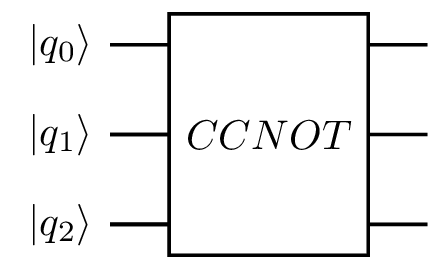

In [37]:
from pyquil.gates import CCNOT
p = Program()
p += CCNOT(0,1,2)
display(p, width=300)